## Importation des bibliothèques nécessaires

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import umap
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt


## Chargement des données

In [2]:
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]# Charger les données
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]

## Visualisation d'une nuage de mots de la base de données

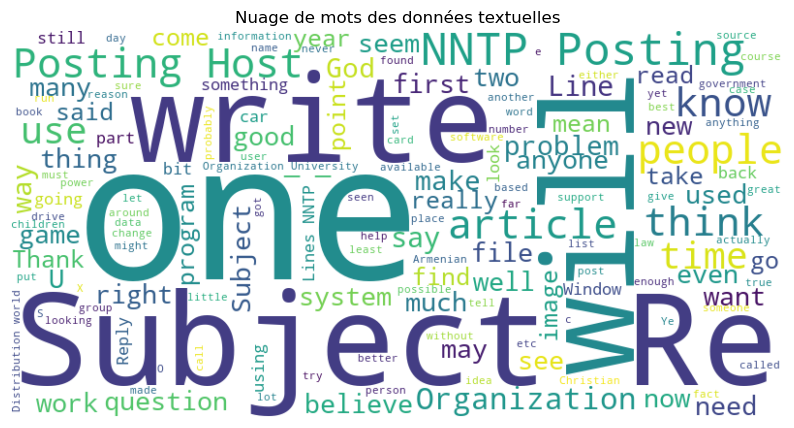

In [3]:

text = ' '.join(corpus)

# Créer un nuage de mots
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des données textuelles')
plt.show()

## Vectorisation des données textuelles

In [4]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(corpus)


## Réduction de la dimensionnalité avec UMAP

In [5]:
umap_reducer = umap.UMAP(n_components=20)
X_umap = umap_reducer.fit_transform(X)

## Application de l'algorithme de clustering k-means

In [6]:
num_clusters = 3  # Nombre de clusters à identifier (vous pouvez ajuster ce paramètre)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_umap)
cluster_labels = kmeans.labels_

C:\Users\33621\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Évaluation du modèle de clustering

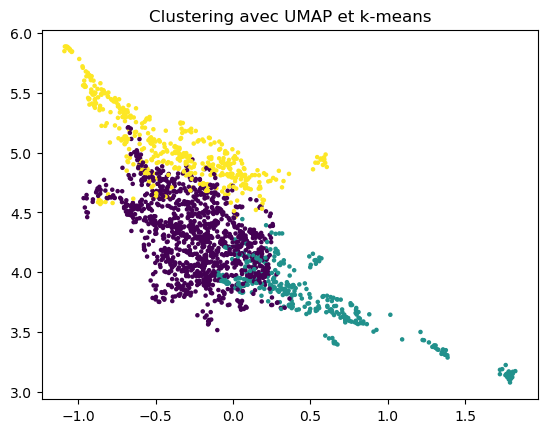

In [7]:
# Visualisation des clusters (pour 2 dimensions)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=cluster_labels, cmap='viridis', s=5)
plt.title('Clustering avec UMAP et k-means')
plt.show()

In [8]:
nmi = normalized_mutual_info_score(labels, cluster_labels)
ari = adjusted_rand_score(labels, cluster_labels)

accuracy = accuracy_score(labels, cluster_labels)

print(f"NMI: {nmi}")
print(f"ARI: {ari}")
print(f"Accuracy: {accuracy}")


NMI: 0.2254091047874812
ARI: 0.06536386882350025
Accuracy: 0.012
